In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from itertools import product
import statsmodels.api
from sklearn.metrics import mean_squared_error, r2_score
import math
from statistics import mean

In [2]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sn
warnings.filterwarnings("ignore")

In [3]:
import yfinance as yf
data = yf.download('^GSPC', start = '2023-01-01', end = '2025-01-01')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2023-01-03,3824.139893,3878.459961,3794.330078,3853.290039,3959140000
2023-01-04,3852.969971,3873.159912,3815.770020,3840.360107,4414080000
2023-01-05,3808.100098,3839.739990,3802.419922,3839.739990,3893450000
2023-01-06,3895.080078,3906.189941,3809.560059,3823.370117,3923560000
2023-01-09,3892.090088,3950.570068,3890.419922,3910.820068,4311770000


In [4]:
data.columns = [col[1] if col[0] == '^GSPC' else col[0] for col in data.columns]
data.reset_index(inplace = True)
data.head()

,Date,Close,High,Low,Open,Volume
0,2023-01-03,3824.139893,3878.459961,3794.330078,3853.290039,3959140000
1,2023-01-04,3852.969971,3873.159912,3815.770020,3840.360107,4414080000
2,2023-01-05,3808.100098,3839.739990,3802.419922,3839.739990,3893450000
3,2023-01-06,3895.080078,3906.189941,3809.560059,3823.370117,3923560000
4,2023-01-09,3892.090088,3950.570068,3890.419922,3910.820068,4311770000


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

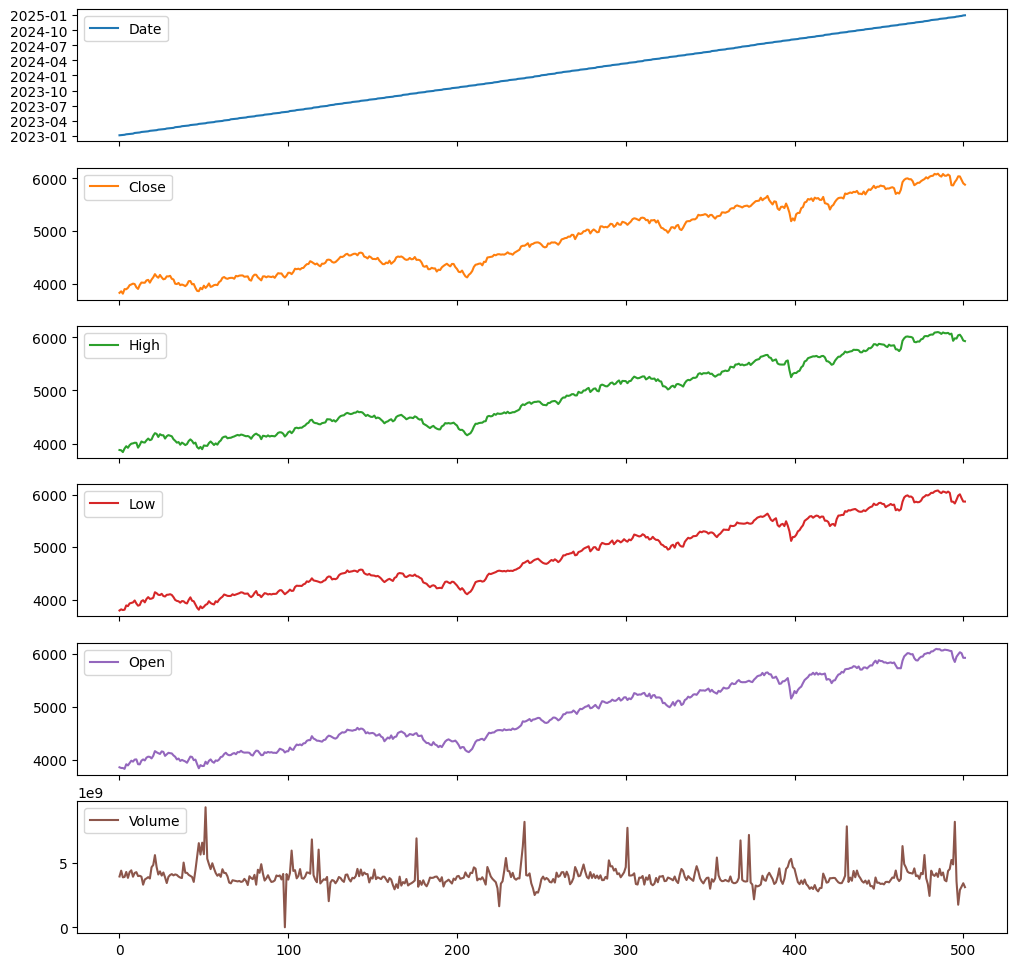

In [5]:
data.plot(kind = "line", figsize = (12, 12), subplots = True)

In [6]:
adf_result_1 = adfuller(data["Close"])
print("Close")
print(f"ADF Statistics: {adf_result_1[0]}")
print(f"p-value: {adf_result_1[1]}\n")

adf_result_2 = adfuller(data["High"])
print("High")
print(f"ADF Statistics: {adf_result_2[0]}")
print(f"p-value: {adf_result_2[1]}\n")

adf_result_3 = adfuller(data["Low"])
print("Low")
print(f"ADF Statistics: {adf_result_3[0]}")
print(f"p-value: {adf_result_3[1]}\n")

adf_result_4 = adfuller(data["Open"])
print("Open")
print(f"ADF Statistics: {adf_result_4[0]}")
print(f"p-value: {adf_result_4[1]}\n")

adf_result_5 = adfuller(data["Volume"])
print("Volume")
print(f"ADF Statistics: {adf_result_5[0]}")
print(f"p-value: {adf_result_5[1]}")

Close
ADF Statistics: -0.6953682953644099
p-value: 0.8479456087585396

High
ADF Statistics: -0.5662837895117018
p-value: 0.8784199781447657

Low
ADF Statistics: -0.6894209218812432
p-value: 0.8494707606540364

Open
ADF Statistics: -0.5428955000406392
p-value: 0.8833704523819315

Volume
ADF Statistics: -10.85987169145096
p-value: 1.4555856626997284e-19


In [7]:
print("Note that none of the time series is stationary since they are all greater than 0.5")

Note that none of the time series is stationary since they are all greater than 0.5


In [8]:
adf_result_1 = adfuller(data["Close"].diff()[1:])
print("Close")
print(f"ADF Statistics: {adf_result_1[0]}")
print(f"p-value: {adf_result_1[1]}\n")

adf_result_2 = adfuller(data["High"].diff()[1:])
print("High")
print(f"ADF Statistics: {adf_result_2[0]}")
print(f"p-value: {adf_result_2[1]}\n")

adf_result_3 = adfuller(data["Low"].diff()[1:])
print("Low")
print(f"ADF Statistics: {adf_result_3[0]}")
print(f"p-value: {adf_result_3[1]}\n")

adf_result_4 = adfuller(data["Open"].diff()[1:])
print("Open")
print(f"ADF Statistics: {adf_result_4[0]}")
print(f"p-value: {adf_result_4[1]}\n")

adf_result_5 = adfuller(data["Volume"].diff()[1:])
print("Volume")
print(f"ADF Statistics: {adf_result_5[0]}")
print(f"p-value: {adf_result_5[1]}")

Close
ADF Statistics: -21.433175088675547
p-value: 0.0

High
ADF Statistics: -20.2435785009808
p-value: 0.0

Low
ADF Statistics: -15.635162709006693
p-value: 1.666517916848424e-28

Open
ADF Statistics: -16.63817600785681
p-value: 1.643469498479963e-29

Volume
ADF Statistics: -8.140625611990046
p-value: 1.0305145668653084e-12


In [9]:
print("Since all the values are less than 0.05, then the 5 time series is said to be stationary.\n We proceed")

Since all the values are less than 0.05, then the 5 time series is said to be stationary.
 We proceed


In [10]:
print("Now, we check for correlation between the time series.")

Now, we check for correlation between the time series.


In [11]:
series = data[["Close", "High", "Low", "Open", "Volume"]]
for i in range(len(series.columns)):
    for j in range(len(series.columns)):
        if i != j:
            test = grangercausalitytests(series[[series.columns[i], series.columns[j]]], maxlag = 6)
            print(f"Granger causality test: {series.columns[i]} --> {series.columns[j]}\n")
            # print(test)
        


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2440  , p=0.2652  , df_denom=498, df_num=1
ssr based chi2 test:   chi2=1.2515  , p=0.2633  , df=1
likelihood ratio test: chi2=1.2499  , p=0.2636  , df=1
parameter F test:         F=1.2440  , p=0.2652  , df_denom=498, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0227  , p=0.0496  , df_denom=495, df_num=2
ssr based chi2 test:   chi2=6.1064  , p=0.0472  , df=2
likelihood ratio test: chi2=6.0694  , p=0.0481  , df=2
parameter F test:         F=3.0227  , p=0.0496  , df_denom=495, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1980  , p=0.0874  , df_denom=492, df_num=3
ssr based chi2 test:   chi2=6.6880  , p=0.0825  , df=3
likelihood ratio test: chi2=6.6435  , p=0.0842  , df=3
parameter F test:         F=2.1980  , p=0.0874  , df_denom=492, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7765  , p=0.1323  

In [12]:
print("Close --> high: > lag2 \n Close --> Low: did not achieve < 0.05 at lag 6 \n Close --> Open: same \n Close --> Volume: > lag 5 \n High --> all: at lag 1. \n And so on")

Close --> high: > lag2 
 Close --> Low: did not achieve < 0.05 at lag 6 
 Close --> Open: same 
 Close --> Volume: > lag 5 
 High --> all: at lag 1. 
 And so on


In [13]:
data1=data[["Close", "Volume"]]
data1.shape

(502, 2)

In [14]:
train = data1[: -52]
test = data1[-52:]
test.shape
train.shape

(450, 2)

In [15]:
model = VAR(train.diff()[1:])

In [16]:
sorted_order = model.select_order(maxlags = 100)
sorted_order.summary()

,AIC,BIC,FPE,HQIC
0,48.37,48.39,1.017e+21,48.38
1,48.20,48.27*,8.572e+20,48.23
2,48.19,48.30,8.516e+20,48.24
3,48.16,48.32,8.248e+20,48.22
4,48.14*,48.34,8.095e+20*,48.22*
5,48.16,48.40,8.213e+20,48.25
6,48.16,48.45,8.222e+20,48.27
7,48.16,48.49,8.257e+20,48.29
8,48.17,48.54,8.278e+20,48.31
9,48.17,48.59,8.347e+20,48.34


In [17]:
print("The mimnimum value was found at lag = 4")

The mimnimum value was found at lag = 4


In [18]:
var_model = VARMAX(train, order = (4, 0), enforce_stationarity = True)
fit = var_model.fit()
fit.summary()

Dep. Variable:,"['Close', 'Volume']",No. Observations:,450
Model:,VAR(4),Log Likelihood,-12077.696
,+ intercept,AIC,24197.392
Date:,"Tue, 18 Nov 2025",BIC,24283.687
Time:,22:40:32,HQIC,24231.404
Sample:,0,,
,- 450,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.23, 0.00",Jarque-Bera (JB):,"22.72, 2942.71"
Prob(Q):,"0.63, 0.99",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"1.57, 0.96",Skew:,"-0.33, 1.77"


In [25]:
pred = fit.predict(start = len(train), end = len(train) + len(test) -1)
mse = mean_squared_error(test, pred)
r2 = r2_score(test, pred)
print(F"MSE:{mse}, R-squared:{r2}")

MSE:4.877586397425039e+17, R-squared:-0.6541062052130504
